In [19]:
# импортируем библиотеки для работы с данными
import pandas as pd
from sklearn import preprocessing

import plotly
import plotly.express as px

# загрузим данные
df = pd.read_csv("data/segmented_customers.csv")
# посмотрим на данные
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,0,20.0,16.0,6.0
3,4,0,23.0,16.0,77.0
4,5,0,31.0,17.0,40.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     200 non-null    int64  
 1   gender          200 non-null    int64  
 2   age             200 non-null    float64
 3   annual_income   200 non-null    float64
 4   spending_score  200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [10]:
# посмотрим, есть ли пропуски в датасете
df[df.isna().any(axis=1)]

,customer_id,gender,age,annual_income,spending_score


In [12]:
# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [13]:
# проверим, есть ли в данных дубликаты
df[df.duplicated(subset=['customer_id'])]

,customer_id,gender,age,annual_income,spending_score


In [20]:
def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

In [15]:
X = df[['age', 'annual_income', 'spending_score']]

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=11, min_samples=5)
cluster_dbscan_res = dbscan.fit_predict(X)
df['cluster_dbscan_res'] = cluster_dbscan_res

In [39]:
get_3d_visualization(df, cluster_dbscan_res)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('age=%{x}<br>annual_income=%{y}' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,  0,
                                         -1, -1,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0, -1,  0, -1,  0, -1,  0,
                                         -1,  0,  1,  0, -1,  0,  2,  2, -1,  0,  2,  2,  2,  2,  2,  2,  2,  2,
                                          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
                                          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
                                          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
                                          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3, -1,  3,
                                          2,  3, -1,  3,  4,  3, -1,  3, -1,  3,  4,  3, -1,  3, -1,  3, -1,  3,
                                         -1,  3, -1,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3, -1,  3, -1,  3,
                                         -1,  3,  4,  3,  4,  3,  4, -1,  4,  3, -1,  3, -1,  3, -1,  3, -1,  3,
                                         -1,  3, -1,  3, -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,
                                         -1, -1], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([19., 21., 20., 23., 31., 22., 35., 23., 64., 30., 67., 35., 58., 24.,
                          37., 22., 35., 20., 52., 35., 35., 25., 46., 31., 54., 29., 45., 35.,
                          40., 23., 60., 21., 53., 18., 49., 21., 42., 30., 36., 20., 65., 24.,
                          48., 31., 49., 24., 50., 27., 29., 31., 49., 33., 31., 59., 50., 47.,
                          51., 69., 27., 53., 70., 19., 67., 54., 63., 18., 43., 68., 19., 32.,
                          70., 47., 60., 60., 59., 26., 45., 40., 23., 49., 57., 38., 67., 46.,
                          21., 48., 55., 22., 34., 50., 68., 18., 48., 40., 32., 24., 47., 27.,
                          48., 20., 23., 49., 67., 26., 49., 21., 66., 54., 68., 66., 65., 19.,
                          38., 19., 18., 19., 63., 49., 51., 50., 27., 38., 40., 39., 23., 31.,
                          43., 40., 59., 38., 47., 39., 25., 31., 20., 29., 44., 32., 19., 35.,
                          57., 32., 28., 32., 25., 28., 48., 32., 34., 34., 43., 39., 44., 38.,
                          47., 27., 37., 30., 34., 30., 56., 29., 19., 31., 50., 36., 42., 33.,
                          36., 32., 40., 28., 36., 36., 52., 30., 58., 27., 59., 35., 37., 32.,
                          46., 29., 41., 30., 54., 28., 41., 36., 34., 32., 33., 38., 47., 35.,
                          45., 32., 32., 30.]),
              'y': array([ 15.,  15.,  16.,  16.,  17.,  17.,  18.,  18.,  19.,  19.,  19.,  19.,
                           20.,  20.,  20.,  20.,  21.,  21.,  23.,  23.,  24.,  24.,  25.,  25.,
                           28.,  28.,  28.,  28.,  29.,  29.,  30.,  30.,  33.,  33.,  33.,  33.,
                           34.,  34.,  37.,  37.,  38.,  38.,  39.,  39.,  39.,  39.,  40.,  40.,
                           40.,  40.,  42.,  42.,  43.,  43.,  43.,  43.,  44.,  44.,  46.,  46.,
                           46.,  46.,  47.,  47.,  48.,  48.,  48.,  48.,  48.,  48.,  49.,  49.,
                           50.,  50.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,
                           54.,  54.,  57.,  57.,  58.,  58.,  59.,  59.,  60.,  60.,  60.,  60.,
                           60.,  60.,  61.,  61.,  62.,  62.,  62.,  62.,  62.,  62.,  63.,  63.,
               

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

In [42]:
agglomerative_clustering = get_aggl_clustering(X, 3)

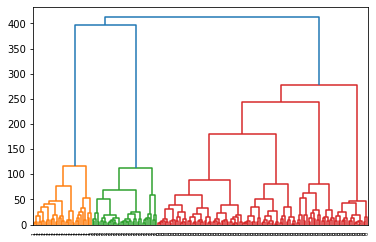

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'ward')

dendrogram(
    Z=linked,
    orientation='top',
    labels=agglomerative_clustering,
    distance_sort='descending'
)

plt.show()

In [47]:
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('age=%{x}<br>annual_income=%{y}' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
                                         4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 1, 5,
                                         5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1,
                                         1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5,
                                         1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 1, 1, 1,
                                         5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2,
                                         0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                         0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                         0, 2, 0, 2, 0, 2, 0, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([19., 21., 20., 23., 31., 22., 35., 23., 64., 30., 67., 35., 58., 24.,
                          37., 22., 35., 20., 52., 35., 35., 25., 46., 31., 54., 29., 45., 35.,
                          40., 23., 60., 21., 53., 18., 49., 21., 42., 30., 36., 20., 65., 24.,
                          48., 31., 49., 24., 50., 27., 29., 31., 49., 33., 31., 59., 50., 47.,
                          51., 69., 27., 53., 70., 19., 67., 54., 63., 18., 43., 68., 19., 32.,
                          70., 47., 60., 60., 59., 26., 45., 40., 23., 49., 57., 38., 67., 46.,
                          21., 48., 55., 22., 34., 50., 68., 18., 48., 40., 32., 24., 47., 27.,
                          48., 20., 23., 49., 67., 26., 49., 21., 66., 54., 68., 66., 65., 19.,
                          38., 19., 18., 19., 63., 49., 51., 50., 27., 38., 40., 39., 23., 31.,
                          43., 40., 59., 38., 47., 39., 25., 31., 20., 29., 44., 32., 19., 35.,
                          57., 32., 28., 32., 25., 28., 48., 32., 34., 34., 43., 39., 44., 38.,
                          47., 27., 37., 30., 34., 30., 56., 29., 19., 31., 50., 36., 42., 33.,
                          36., 32., 40., 28., 36., 36., 52., 30., 58., 27., 59., 35., 37., 32.,
                          46., 29., 41., 30., 54., 28., 41., 36., 34., 32., 33., 38., 47., 35.,
                          45., 32., 32., 30.]),
              'y': array([ 15.,  15.,  16.,  16.,  17.,  17.,  18.,  18.,  19.,  19.,  19.,  19.,
                           20.,  20.,  20.,  20.,  21.,  21.,  23.,  23.,  24.,  24.,  25.,  25.,
                           28.,  28.,  28.,  28.,  29.,  29.,  30.,  30.,  33.,  33.,  33.,  33.,
                           34.,  34.,  37.,  37.,  38.,  38.,  39.,  39.,  39.,  39.,  40.,  40.,
                           40.,  40.,  42.,  42.,  43.,  43.,  43.,  43.,  44.,  44.,  46.,  46.,
                           46.,  46.,  47.,  47.,  48.,  48.,  48.,  48.,  48.,  48.,  49.,  49.,
                           50.,  50.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,
                           54.,  54.,  57.,  57.,  58.,  58.,  59.,  59.,  60.,  60.,  60.,  60.,
                           60.,  60.,  61.,  61.,  62.,  62.,  62.,  62.,  62.,  62.,  63.,  63.,
                           63.,  63.,  63.,  63.,  64.,  64.,  65.,  65.,  65.,  65.,  67.,  67.,
                           67.,  67.,  69.,  69.,  70.,  70.,  71.,  71.,  71.,  71.,  71.,  71.,
                           72.,  72.,  73.,  73.,  73.,  73.,  74.,  74.,  75.,  75.,  76.,  76.,
                           77.,  77.,  77., 